<ipython-input-11-e87e9c42ca05>:12: RuntimeWarning: overflow encountered in scalar add
  gray_image[i, j] = (min_val + max_val) // 2


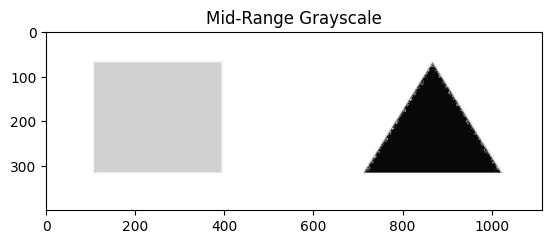

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Step 1: Mid-Range Grayscale Conversion
def midRangeGrayscale(rgb_image):
    gray_image = np.zeros((rgb_image.shape[0], rgb_image.shape[1]), dtype=np.uint8)
    for i in range(rgb_image.shape[0]):
        for j in range(rgb_image.shape[1]):
            r, g, b = rgb_image[i, j]
            min_val, max_val = min(r, g, b), max(r, g, b)
            gray_image[i, j] = (min_val + max_val) // 2
    return gray_image

# Load the image
input_image = cv2.imread("/content/z5958595630554_f4880e31ef9f328035bf960fbf1cd8da.jpg")
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Apply mid-range grayscale conversion
gray_image = midRangeGrayscale(input_image_rgb)

# Save and display the grayscale image
cv2.imwrite("gray_image.png", gray_image)
plt.imshow(gray_image, cmap='gray')
plt.title('Mid-Range Grayscale')
plt.show()

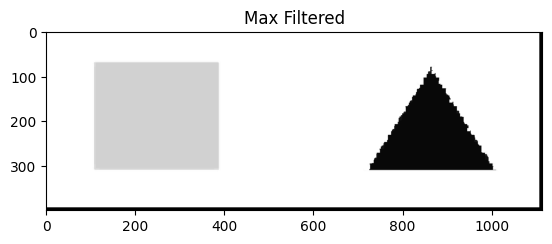

In [2]:
# Step 2: Apply Maximum Filter
def computeMaxFilter(image, kernelSize=7, padding=False):
    if padding:
        pad = kernelSize // 2
        image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    max_gray = np.zeros_like(image)
    for i in range(image.shape[0] - kernelSize + 1):
        for j in range(image.shape[1] - kernelSize + 1):
            max_gray[i, j] = np.max(image[i:i + kernelSize, j:j + kernelSize])
    return max_gray

# Apply max filter
max_gray = computeMaxFilter(gray_image, kernelSize=7)

# Save and display the max-filtered image
cv2.imwrite("max_gray.png", max_gray)
plt.imshow(max_gray, cmap='gray')
plt.title('Max Filtered')
plt.show()

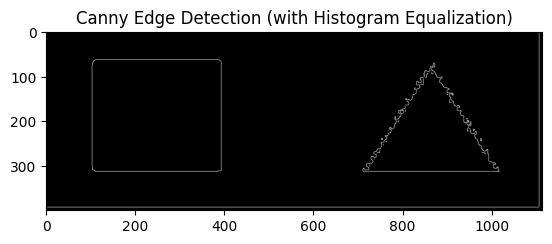

In [9]:
# Step 3: Enhanced Canny Edge Detection with Histogram Equalization
def findEdgeUsingCanny(gray_image, low_t=20, high_t=80):
    # Apply histogram equalization to improve contrast
    equalized_img = cv2.equalizeHist(gray_image)

    # Apply Gaussian Blur to smooth the image and reduce noise
    blurred_img = cv2.GaussianBlur(equalized_img, (5, 5), 0)

    # Perform Canny Edge Detection
    edges = cv2.Canny(blurred_img, low_t, high_t)
    return edges

# Apply Canny Edge Detection with histogram equalization
edge_img = findEdgeUsingCanny(max_gray)

# Save and display the enhanced edge-detected image
cv2.imwrite("enhanced_edge_img.png", edge_img)
plt.imshow(edge_img, cmap='gray')
plt.title('Canny Edge Detection (with Histogram Equalization)')
plt.show()


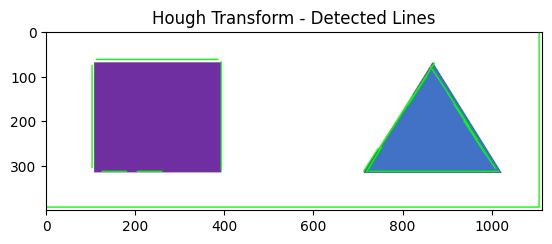

In [12]:
# Step 4: Improved Hough Transform for Line Detection
def hough_transform(edge_img):
    rho = 1
    theta = np.pi / 180
    threshold = 20  # Lower threshold for better detection
    min_line_length = 50  # Minimum length of line
    max_line_gap = 10  # Maximum allowed gap between points on the same line
    lines = cv2.HoughLinesP(edge_img, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)
    return lines

# Apply Hough Transform to detect lines
lines = hough_transform(edge_img)

# Visualize the detected lines on the original image
output_image = input_image_rgb.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines for better visibility

# Save and display the Hough Transform result with lines drawn
cv2.imwrite("hough_lines.png", cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))
plt.imshow(output_image)
plt.title('Hough Transform - Detected Lines')
plt.show()

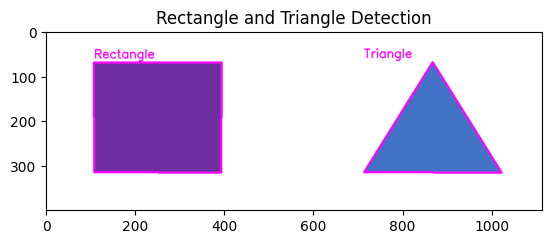

In [14]:
# Step 5: Shape Detection and Labeling
def detect_and_label_shapes(image):
    # Convert image to grayscale and apply thresholding for shape detection
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through contours and identify shapes
    for contour in contours:
        # Approximate the contour
        approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
        x, y, w, h = cv2.boundingRect(approx)

        # If the contour has 4 vertices, it's a rectangle (square)
        if len(approx) == 4:
            cv2.putText(image, 'Rectangle', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)
            cv2.drawContours(image, [approx], 0, (255, 0, 255), 3)
        # If the contour has 3 vertices, it's a triangle
        elif len(approx) == 3:
            cv2.putText(image, 'Triangle', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)
            cv2.drawContours(image, [approx], 0, (255, 0, 255), 3)

# Load the original image
output_image = input_image_rgb.copy()

# Detect and label the shapes
detect_and_label_shapes(output_image)

# Save and display the final image with labeled shapes
cv2.imwrite("labeled_shapes.png", cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))
plt.imshow(output_image)
plt.title('Rectangle and Triangle Detection')
plt.show()
